In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("../datos/cleandata.csv")
df

,warranty,condition,seller_contact,base_price,non_mercado_pago_payment_methods,variations,price,buying_mode,tags,accepts_mercadopago,...,available_quantity,seller_address_longitude,seller_address_latitude,shipping_local_pick_up,shipping_free_shipping,shipping_mode,pixeles,pixeles_max,days_active,days_since_last_update
0,False,new,False,80.0,3,False,80.0,buy_it_now,True,True,...,1,-58.398671,-34.628070,True,False,not_specified,187500.0,1080000.0,60,0
1,True,used,False,2650.0,2,False,2650.0,buy_it_now,False,True,...,1,-58.505917,-34.593552,True,False,me2,166666.0,605787.0,60,0
2,False,used,False,60.0,3,False,60.0,buy_it_now,True,True,...,1,-58.414395,-34.623391,True,False,me2,187500.0,1080000.0,60,0
3,False,new,False,580.0,3,False,580.0,buy_it_now,False,True,...,1,-58.492921,-34.628189,True,False,me2,186543.0,186543.0,66,6
4,True,used,False,30.0,3,False,30.0,buy_it_now,True,True,...,1,-58.549504,-34.634655,True,False,not_specified,187500.0,307200.0,60,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99156,False,used,False,30.0,2,False,30.0,buy_it_now,True,True,...,1,-58.614289,-34.489321,True,False,me2,187500.0,1080000.0,60,0
99157,False,new,False,239.0,2,False,239.0,buy_it_now,False,True,...,5,-58.678325,-34.370216,False,False,not_specified,187500.0,1080000.0,60,0
99158,False,used,False,600.0,0,True,600.0,buy_it_now,False,True,...,1,-58.624120,-34.646786,False,False,me2,187500.0,1080000.0,60,0
99159,True,used,False,50.0,2,False,50.0,buy_it_now,True,True,...,1,-58.402037,-34.610009,True,False,me2,193500.0,1117200.0,60,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99161 entries, 0 to 99160
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   warranty                          99161 non-null  bool   
 1   condition                         99161 non-null  object 
 2   seller_contact                    99161 non-null  bool   
 3   base_price                        99161 non-null  float64
 4   non_mercado_pago_payment_methods  99161 non-null  int64  
 5   variations                        99161 non-null  bool   
 6   price                             99161 non-null  float64
 7   buying_mode                       99161 non-null  object 
 8   tags                              99161 non-null  bool   
 9   accepts_mercadopago               99161 non-null  bool   
 10  original_price                    99161 non-null  float64
 11  automatic_relist                  99161 non-null  bool   
 12  stat

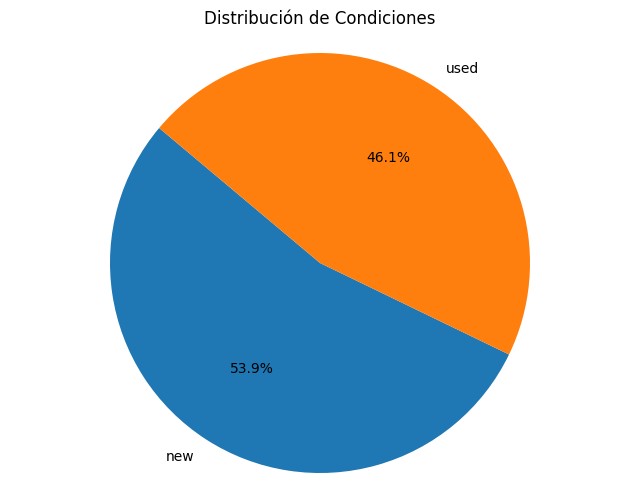

In [11]:
condition_counts = df['condition'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Condiciones')
plt.axis('equal')
plt.show()

In [3]:
df['condition'] = df['condition'].map({'used': 0, 'new': 1})

In [4]:
X = df.drop('condition', axis=1)  # Features
y = df['condition'] #Target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category', 'string', 'boolean']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  
        ('cat', OneHotEncoder(), cat_cols)   
    ]
)

In [7]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGB Classifier': XGBClassifier()
}

In [8]:
def evaluate_models(X_train, y_train, X_test, y_test, models):
    results = {}

    for model_name, model in models.items():
        pipeline = Pipeline(steps=[  # Define the pipeline within the loop
            ('preprocessor', preprocessor),
            ('classifier', model)  # Use the current model
        ])
        
        pipeline.fit(X_train, y_train)  # Fit the model to the training set
        
        y_pred = pipeline.predict(X_test)  # Predictions on the test set
        
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = accuracy
        
        print(f"{model_name} Accuracy: {accuracy:.2f}")
        print(classification_report(y_test, y_pred))

    return results

In [9]:
results = evaluate_models(X_train, y_train, X_test, y_test, models)
results

Logistic Regression Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.68      0.73      0.70     13691
           1       0.75      0.70      0.73     16058

    accuracy                           0.71     29749
   macro avg       0.71      0.71      0.71     29749
weighted avg       0.72      0.71      0.71     29749

Random Forest Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     13691
           1       0.88      0.81      0.85     16058

    accuracy                           0.84     29749
   macro avg       0.84      0.84      0.84     29749
weighted avg       0.84      0.84      0.84     29749

Decision Tree Classifier Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     13691
           1       0.81      0.80      0.80     16058

    accuracy                           0.79     29749
   macro avg       0.79 

{'Logistic Regression': 0.7139735789438301,
 'Random Forest': 0.8398937779421157,
 'Decision Tree Classifier': 0.7884970923392383,
 'K-Nearest Neighbors': 0.753369861171804,
 'Gradient Boosting': 0.8238596255336313,
 'Naive Bayes': 0.6236512151668964,
 'XGB Classifier': 0.8456418703149686}

In [ ]:
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))